In [71]:
from scipy import misc
from PIL import Image
import numpy as np
import scipy.ndimage
import itertools
import scipy.misc
from skimage import data, io, filter
from scipy.misc.pilutil import Image
import matplotlib.pyplot as pl
import cPickle
from scipy import ndimage, interpolate
import pylab as pl
import sys
import matplotlib
import os
import math as m
from matplotlib import cm
import matplotlib.pyplot as plt
%matplotlib inline
from IPython import display

from skimage.morphology import disk
from skimage.filter import threshold_otsu, rank
from skimage.util import img_as_ubyte

matplotlib.rcParams['font.size'] = 9
from skimage import filters

In [3]:
def listsum(numList):
    theSum = 0
    for i in numList:
        theSum = theSum + i
    return theSum

### Sector Mask Method
This method is to do this. 
This is why we need it.

In [4]:
def sector_mask(shape, centre, radius, angle_range):
    """
    Return a boolean mask for a circular sector. The start/stop angles in  
    `angle_range` should be given in clockwise order.
    """
    x,y = np.ogrid[:shape[0],:shape[1]]
    cx,cy = centre
    tmin,tmax = np.deg2rad(angle_range)

    # ensure stop angle > start angle
    if tmax < tmin:
        tmax += 2*np.pi

    # convert cartesian --> polar coordinates
    r2 = (x-cx)*(x-cx) + (y-cy)*(y-cy)
    theta = np.arctan2(x-cx,y-cy) - tmin

    # wrap angles between 0 and 2*pi
    theta %= (2*np.pi)

    # circular mask
    circmask = r2 <= radius*radius

    # angular mask
    anglemask = theta <= (tmax-tmin)

    return circmask*anglemask

In [14]:
fileStub =  'E:\SAM_DATA'
counter = 0
this_list = os.listdir(fileStub)
sliced = this_list[:]
name = sliced[0]

In [15]:
name

'M6-3T.tif'

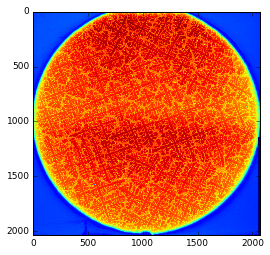

In [22]:
counter += 1
fileName = fileStub + '/' + name
img = misc.imread(fileName)
plt.imshow(img)

### Gamma Correction
This is where I describe what I am doing in the next section

0.963050368193


C:\Python27\lib\site-packages\ipykernel\__main__.py:9: RuntimeWarning: divide by zero encountered in log


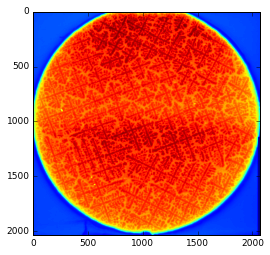

In [33]:
# Gamma Correction
# Higher value yields darker/more contrasted images
gamma = 3
new_image = img.astype(float)
maxi = np.max(new_image)
print maxi
    
normalized_image = new_image / maxi
normalized_image = np.log(normalized_image) * gamma

final = np.exp(normalized_image) * 255.0
final = final.astype(int)
plt.imshow(img)

### Gaussian Filter
Why do we do this? Because it makes it look better.

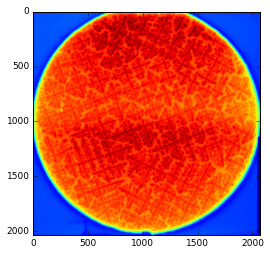

In [34]:
img = filters.gaussian_filter(img, 4.5)
plt.imshow(img)

### Find the disk!

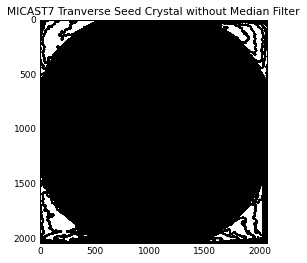

In [35]:
r = 12
selem = disk(r)

local_otsu = rank.otsu(img, selem)
threshold_global_otsu = threshold_otsu(img)
global_otsu = img >= threshold_global_otsu
        
plt.imshow(img >= local_otsu, cmap=plt.cm.gray)
plt.title('MICAST7 Tranverse Seed Crystal without Median Filter')
plt.show()

### Found the disk!

[1 1 1 ..., 1 1 1]


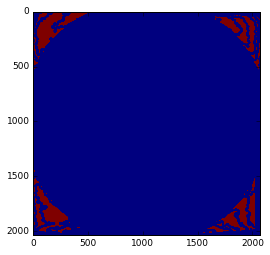

In [81]:
img2 = img >= local_otsu

final = np.array(img2) + 1

maskt= sector_mask(final.shape,ndimage.measurements.center_of_mass(final), 805,(0,360))
totalaverage = final[np.nonzero(maskt)]
print totalaverage
plt.imshow(final)

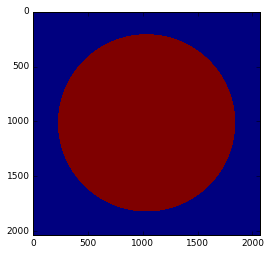

In [37]:
plt.imshow(maskt)

In [50]:
os.ch

'E:\\workspace\\GoogleFooBar\\src'

# What is this doing below?

In [79]:
totala = []
for t in totalaverage:
    totala.append(t)
size = float(len(totala)) 
white = float(listsum(totala)) - totala.count(1)
Fe_average = 1 - white/(2*size)  
print 'white', white, 'size', size, 'Fe_average', Fe_average

radius_step = 115
list_1 = range(0, 805, radius_step)
list_2 = range(radius_step, 920 , radius_step)
print list_1
print list_2

white 0.0 size 2035840.0 Fe_average 1.0
[0, 115, 230, 345, 460, 575, 690]
[115, 230, 345, 460, 575, 690, 805]


In [68]:
Num_theta = []
circle_dict = {}
for i, r in enumerate(list_2):
    t = (((m.pi*(radius_step)**2)*(360)/(m.pi*r**2))) 
    a = np.arange(0, 360, t).tolist()
    b = np.arange(t, (360 + t), t).tolist()
    circle_name = 'circle_' + str(i)
    circle_dict[circle_name] = [a, b, (list_1[i], r), []]
    print circle_name, len(circle_dict[circle_name])

circle_0 [[0.0], [360.0], (0, 115), []]
circle_1 [[0.0, 90.0, 180.0, 270.0], [90.0, 180.0, 270.0, 360.0], (115, 230), []]
circle_2 [[0.0, 40.0, 80.0, 120.0, 160.0, 200.0, 240.0, 280.0, 320.0], [40.0, 80.0, 120.0, 160.0, 200.0, 240.0, 280.0, 320.0, 360.0], (230, 345), []]
circle_3 [[0.0, 22.5, 45.0, 67.5, 90.0, 112.5, 135.0, 157.5, 180.0, 202.5, 225.0, 247.5, 270.0, 292.5, 315.0, 337.5], [22.5, 45.0, 67.5, 90.0, 112.5, 135.0, 157.5, 180.0, 202.5, 225.0, 247.5, 270.0, 292.5, 315.0, 337.5, 360.0], (345, 460), []]
circle_4 [[0.0, 14.399999999999999, 28.799999999999997, 43.199999999999996, 57.599999999999994, 72.0, 86.39999999999999, 100.79999999999998, 115.19999999999999, 129.6, 144.0, 158.39999999999998, 172.79999999999998, 187.2, 201.59999999999997, 215.99999999999997, 230.39999999999998, 244.79999999999998, 259.2, 273.59999999999997, 288.0, 302.4, 316.79999999999995, 331.2, 345.59999999999997, 359.99999999999994], [14.399999999999999, 28.799999999999997, 43.199999999999996, 57.599999999

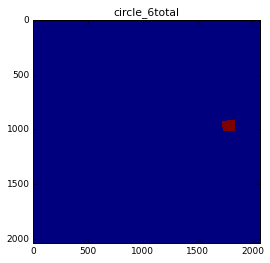

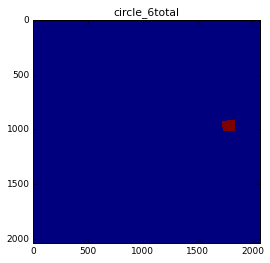

In [75]:
#breaking up into a grid circle1
import time
for circle_name in circle_dict:
    circlea_theta = circle_dict[circle_name][0]
    circleb_theta = circle_dict[circle_name][1]
    circle_radius1, circle_radius2 = circle_dict[circle_name][2]
    print circle_name, circlea_theta, circleb_theta
    for y, z in itertools.izip(circlea_theta, circleb_theta):
        total = sector_mask(final.shape,
                            ndimage.measurements.center_of_mass(final),
                            circle_radius1,
                            (y,z))
        plt.title(circle_name+'Total1')
        if circle_name != 'circle_1':
            mask2 = sector_mask(final.shape,
                                ndimage.measurements.center_of_mass(final),
                                circle_radius2,
                                (y,z))
            total= mask2-total
        plt.imshow(total)
        plt.title(circle_name+'total')
        display.clear_output(wait=True)
        display.display(pl.gcf())
        time.sleep(0.1)
        totalc= final[np.nonzero(total)] 
        total = []
        for t in totalc:
            total.append(t)
        size = float(len(total))
        white = listsum(total) - total.count(1)
        Fe = 1 - (white/(2.0*size))
        circle_dict[circle_name][3].append(Fe)
    
    try:
        allcircles += circle_dict[circle_name][3]
    except NameError:
        allcircles = circle_dict[circle_name][3]

In [76]:
dA = m.pi*115**2
area = m.pi*805**2
sum = []
for m1 in allcircles:
    s = ((m1/(Fe_average))-1)**2*dA
    sum.append(s)
    
Srms = (listsum(sum)/area)**0.5

stdev = []
for p in allcircles:
    d = ((p/(Fe_average))-1)**2
    stdev.append(d)

stdev = np.asarray(stdev)

print name
print Srms
print np.std(stdev)
print Fe_average

M6-3T.tif
0.0
0.0
1.0
